# Final Project Submission

Please fill out:
* Student name: Clinton Wasonga
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### 1. DATA PREPARATION

In [118]:
#import all libraries we will be working with
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Your code here - remember to use markdown cells for comments as well!

In [119]:
#Create a connection with the database

conn = sqlite3.connect(r"C:\Users\hello\Documents\DataScience\dsc-phase-1-project-v2-4\zippedData\im.db\im.db")

#cursor should enable us run sql commands
curs=conn.cursor()



In [120]:
q="""
SELECT *
FROM movie_basics
"""
df = pd.read_sql(q, conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [121]:
q="""
SELECT *
FROM movie_ratings
"""
df2 = pd.read_sql(q, conn)
df2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Let's also load the CSV file to get an understanding of all the datasets and how they may relate to each other


In [122]:
df3 = pd.read_csv(r"C:\Users\hello\Documents\DataScience\dsc-phase-1-project-v2-4\zippedData\bom.movie_gross.csv.gz")
df3

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## 2. DATA UNDERSTANDING
Here we will try and understand the columns of the data and how the differnt datasets relate with each other

In [123]:
#Let's start with the movie_basics table
df.shape

(146144, 6)

In [124]:
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [127]:
df3

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [128]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [129]:
#change foreign_gross from object data type to numeric data type
df3['foreign_gross'] = df3['foreign_gross'].str.replace(',', '', regex=True)
df3['foreign_gross'] = pd.to_numeric(df3['foreign_gross'], errors='coerce')


In [130]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [131]:
#join the datasets to get more comprehensive details
q="""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
ORDER BY (averagerating) DESC
"""
merged_df = pd.read_sql(q, conn)
#merged_df = pd.merge(df, df2, on='movie_id', how='inner')
merged_df.head(50)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
2,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
3,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
4,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
5,tt4944240,Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5
6,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
7,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
8,tt5344358,All Around Us,All Around Us,2019,NaN,Documentary,10.0,6
9,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5


In [132]:
#change title name in df3 to primary title and merge the datasets
df3 = df3.rename(columns={'title': 'primary_title'})

merged_df = pd.merge(merged_df, df3, on='primary_title', how='inner')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt1455256,The Wall,The Wall,2010,78.0,Documentary,9.2,8,RAtt.,1800000.0,2700000.0,2017
1,tt1745686,The Wall,Die Wand,2012,108.0,"Drama,Fantasy,Mystery",6.8,5484,RAtt.,1800000.0,2700000.0,2017
2,tt6060874,The Wall,The Wall,2016,73.0,Drama,6.7,12,RAtt.,1800000.0,2700000.0,2017
3,tt4218696,The Wall,The Wall,2017,88.0,"Action,Drama,Thriller",6.2,20391,RAtt.,1800000.0,2700000.0,2017
4,tt6168914,The Runaways,The Runaways,2019,108.0,Adventure,9.2,47,App.,3600000.0,1100000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt1699513,Beginning of the Great Revival,Jian dang wei ye,2011,140.0,"Drama,History",2.5,5538,CL,151000.0,58200000.0,2011
3023,tt3726012,Mastizaade,Mastizaade,2016,119.0,Comedy,2.4,2267,Eros,43400.0,NaN,2016
3024,tt2344678,Himmatwala,Himmatwala,2013,150.0,"Action,Comedy,Drama",1.7,7384,UTV,271000.0,NaN,2013
3025,tt1702443,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,2011,105.0,"Documentary,Music",1.6,74978,Par.,73000000.0,26000000.0,2011


## 3. DATA CLEANING

In [133]:
#Check for duplicates
merged_df.duplicated().sum()

0

In [134]:
#check for missing values
merged_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [135]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


In [136]:
#replace the missing values in runtime_minutes column with the mean
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].mean())

In [137]:
#replace the missing values in domestic_gross column with the mean

merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(merged_df['domestic_gross'].mean())

In [138]:
merged_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross        0
foreign_gross      1195
year                  0
dtype: int64

In [ ]:
#Drop the rows under the genres column with missing values

In [142]:
#replace the missing values in studio column with the mode
merged_df['studio'] = merged_df['studio'].fillna(merged_df['studio'].mode()[0])

In [143]:
#replace the missing values in genres column with the mode

merged_df['genres'] = merged_df['genres'].fillna(merged_df['genres'].mode()[0])

In [144]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


In [145]:
#compute the summary statistics
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,3027.000000,3027.000000,3027.000000,3.027000e+03,3.027000e+03,1.832000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,7.825969e+07,2014.077635
std,2.466955,19.917382,1.012277,1.255132e+05,6.647332e+07,1.386030e+08,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.445000e+05,4.600000e+06,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.100000e+06,2.120000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.210000e+07,8.162500e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


## 4. DATA ANALYSIS

In [150]:
merged_df['start_year'].value_counts()

2015    391
2014    376
2011    368
2016    358
2010    345
2012    344
2013    339
2017    288
2018    206
2019     12
Name: start_year, dtype: int64

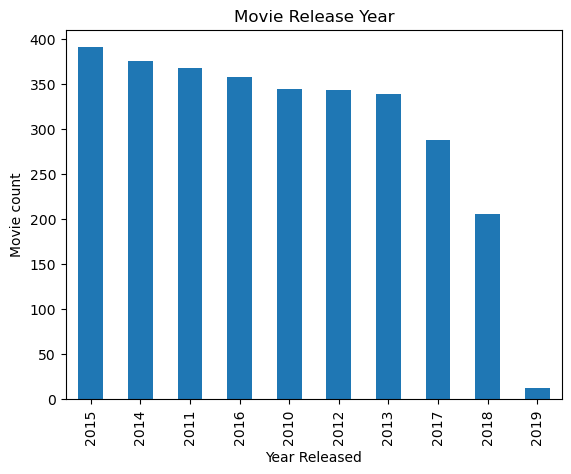

In [238]:
ax = merged_df['start_year'].value_counts().plot(kind='bar', title = 'Movie Release Year')
ax.set_xlabel('Year Released')
ax.set_ylabel('Movie count');

In [234]:
merged_df['genres'].value_counts().head(30)


Drama                         324
Comedy,Drama                  133
Comedy,Drama,Romance          132
Drama,Romance                 112
Documentary                   110
Comedy                         95
Adventure,Animation,Comedy     75
Comedy,Romance                 72
Drama,Thriller                 54
Action,Crime,Drama             47
Action,Adventure,Sci-Fi        47
Biography,Drama,History        44
Action,Comedy,Crime            40
Action,Adventure,Drama         39
Biography,Drama                38
Crime,Drama,Thriller           38
Action,Crime,Thriller          36
Horror,Mystery,Thriller        34
Crime,Drama                    32
Action,Adventure,Comedy        32
Horror,Thriller                32
Action,Thriller                31
Action,Adventure,Fantasy       31
Horror                         30
Action,Drama,Thriller          29
Biography,Comedy,Drama         27
Thriller                       26
Crime,Drama,Mystery            24
Comedy,Crime,Drama             24
Drama,Mystery,

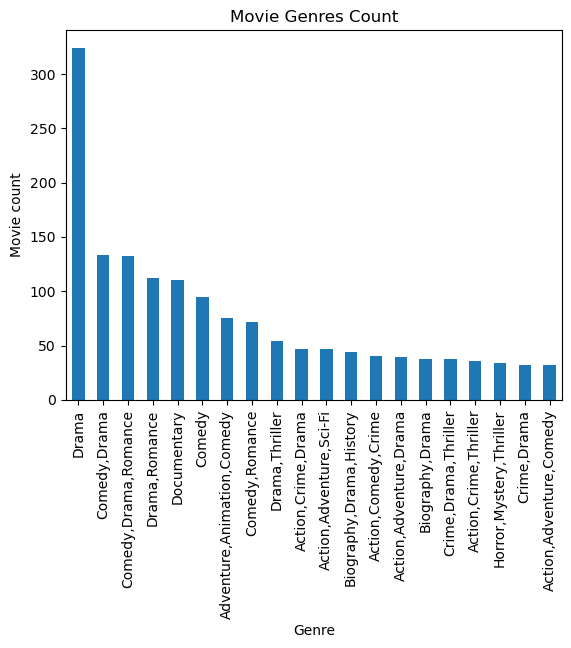

In [237]:
ax = merged_df['genres'].value_counts().head(20).plot(kind='bar', title = 'Movie Genres Count')
ax.set_xlabel('Genre')
ax.set_ylabel('Movie count');


In [177]:
merged_df['averagerating'].value_counts()

6.8    143
6.4    142
6.6    141
6.3    140
7.2    136
      ... 
1.9      1
8.9      1
9.0      1
9.1      1
2.5      1
Name: averagerating, Length: 71, dtype: int64

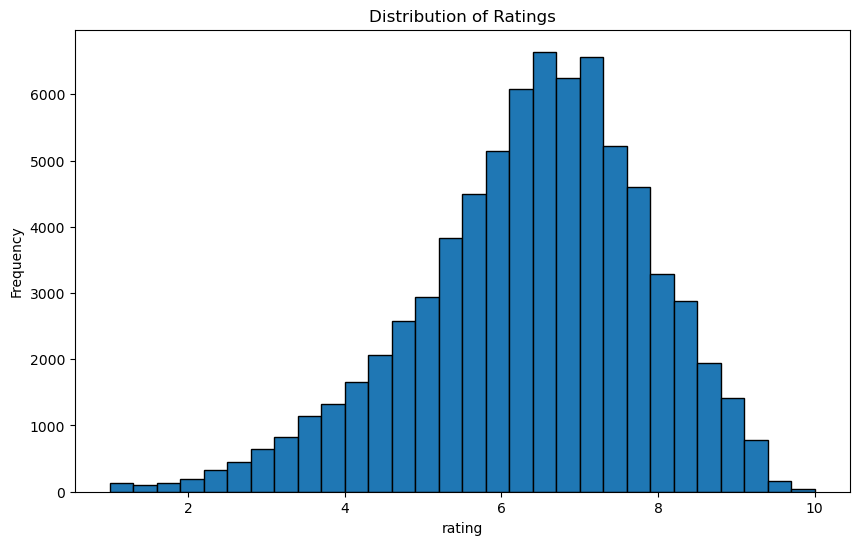

In [222]:
plt.figure(figsize=(10,6))
plt.hist(data['averagerating'], bins=30, ec='black')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings');

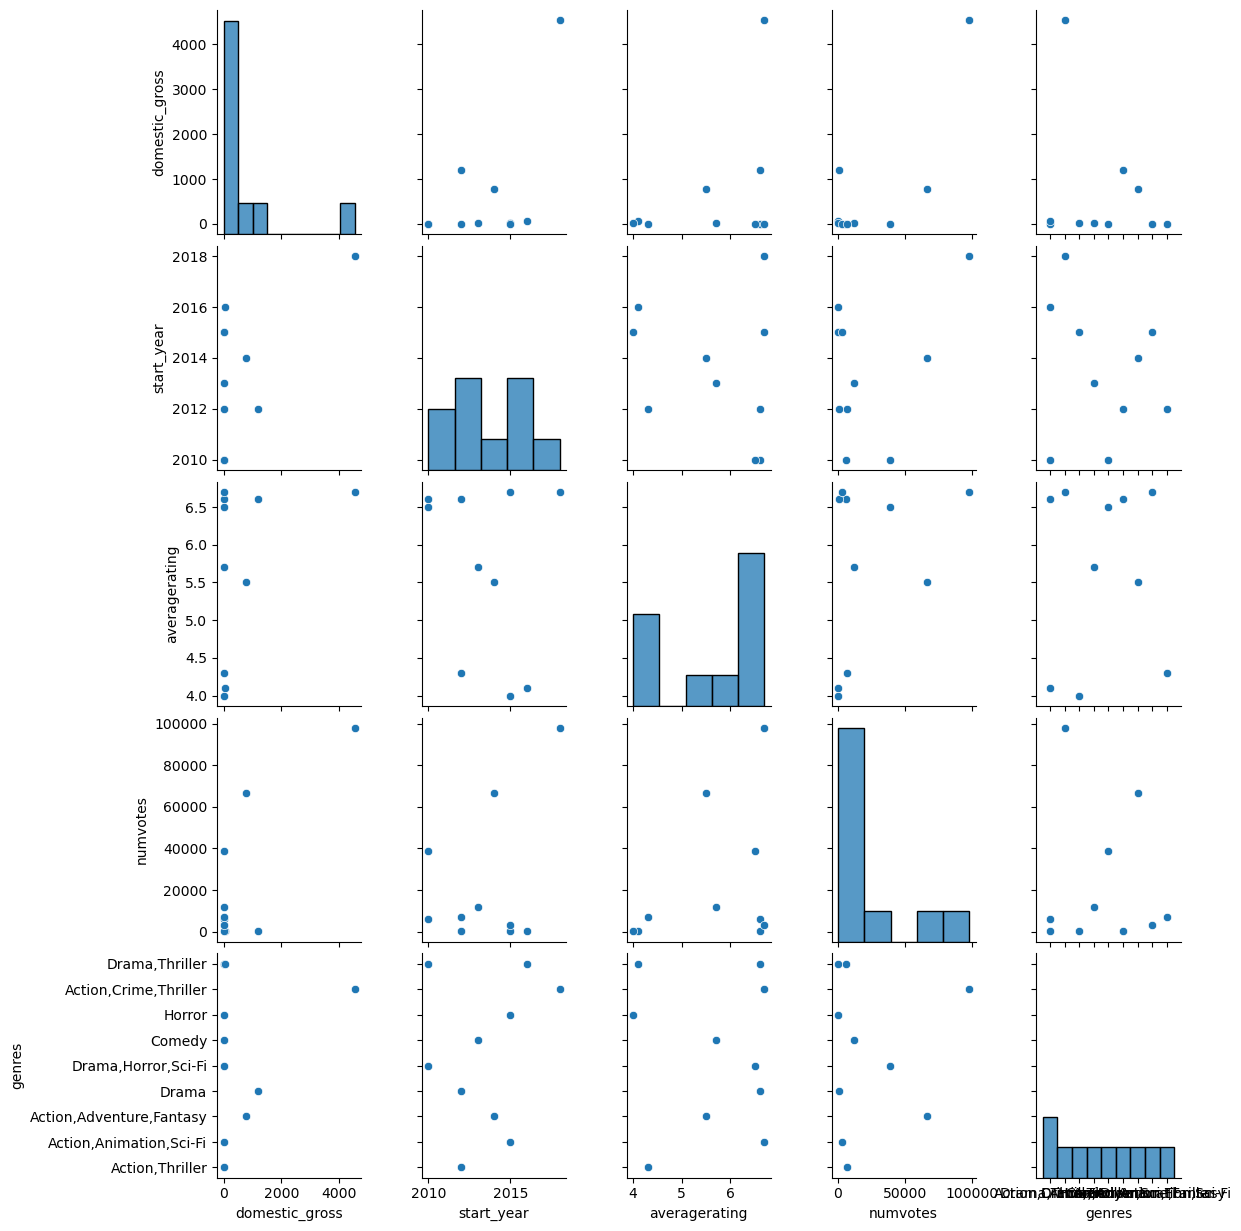

In [210]:
#Get a summary visualization on how the various columns relate with each other
import seaborn as sns

sns.pairplot(merged_df.sample(10), vars=['domestic_gross', 'start_year', 'averagerating', 'numvotes', 'genres'])

In [239]:
correlation = merged_df['averagerating'].corr(merged_df['domestic_gross'])
correlation


0.11858528378036917

In [240]:
#check for correlation between domestic_gross and numvotes
corr = merged_df['domestic_gross'].corr(merged_df['numvotes'])
corr

0.663945754169455

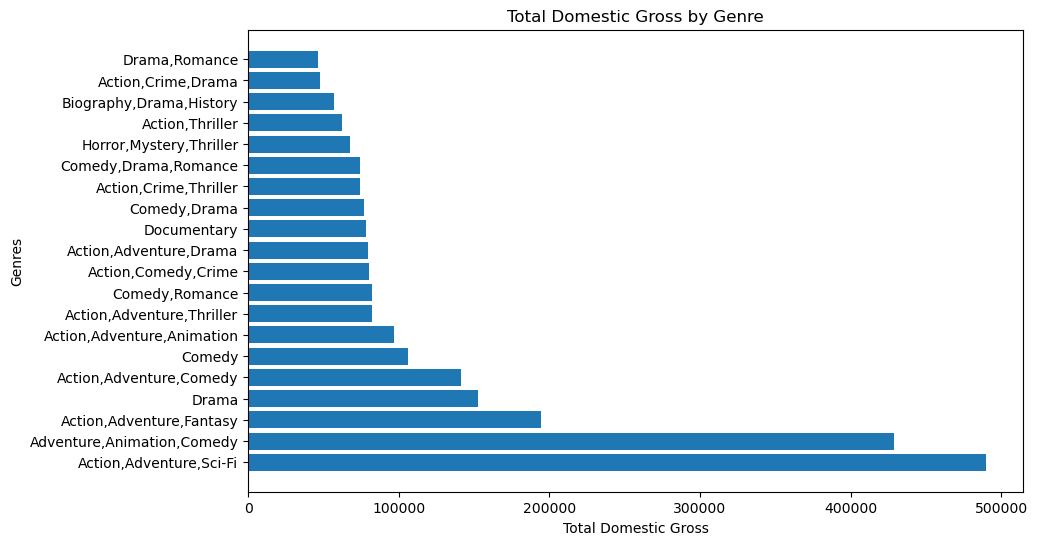

In [229]:
genre_gross = merged_df.groupby('genres')['domestic_gross'].sum().reset_index()
genre_gross = genre_gross.sort_values(by='domestic_gross', ascending=False)
genre_gross = genre_gross.head(20)

plt.figure(figsize=(10, 6))
plt.barh(genre_gross['genres'], genre_gross['domestic_gross'])
plt.xlabel('Total Domestic Gross')
plt.ylabel('Genres')
plt.title('Total Domestic Gross by Genre');

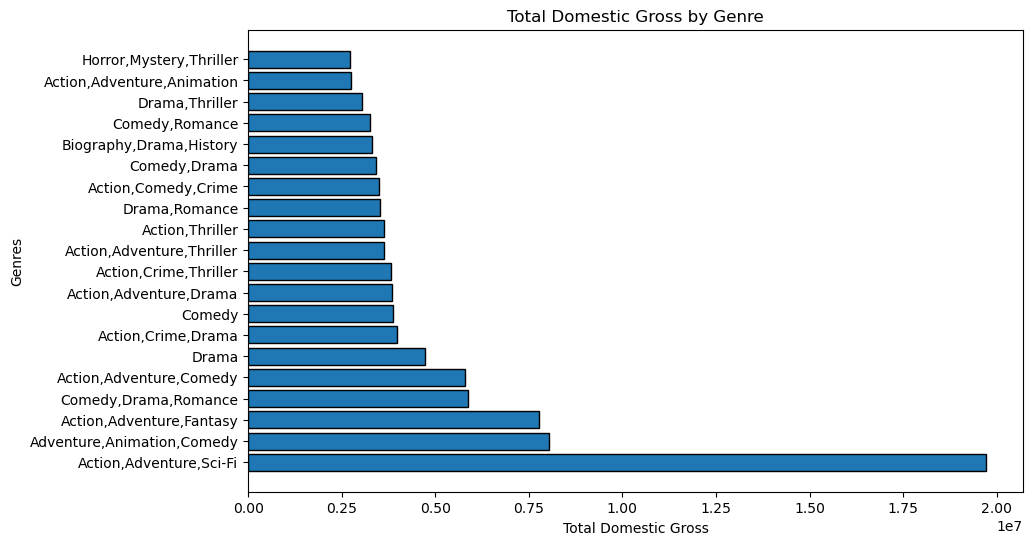

In [235]:
genre_gross = merged_df.groupby('genres')['numvotes'].sum().reset_index()
genre_gross = genre_gross.sort_values(by='numvotes', ascending=False)
genre_gross = genre_gross.head(20)

plt.figure(figsize=(10, 6))
plt.barh(genre_gross['genres'], genre_gross['numvotes'], ec='black')
plt.xlabel('Total Domestic Gross')
plt.ylabel('Genres')
plt.title('Total Domestic Gross by Genre');

There's a moderately strong correlation between domestic_gross and numvotes. An indication that, the more popular the movie, the higher the domestic_gross